In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Import necessary libraries



In [38]:
# Load the dataset
data = pd.read_csv('Admission_Predict.csv')


In [39]:
# Display the first few rows of the dataset
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [40]:
data.columns = data.columns.str.strip()

In [41]:
# Select relevant features (GRE Score and Academic Score) and target variable
X = data[['GRE Score', 'CGPA']]  # GRE Score and Undergraduate GPA (CGPA)
# Remove extra spaces in column names
data.columns = data.columns.str.strip()

# Now, safely access the column
data['Chance of Admit'] = (data['Chance of Admit'] >= 0.5).astype(int)  # Convert to 0 or 1
y = data['Chance of Admit']


In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Step 5: Train Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [44]:
# Step 6: Make Predictions
y_pred = model.predict(X_test)


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.92      0.96      0.94        70

    accuracy                           0.89        80
   macro avg       0.74      0.68      0.70        80
weighted avg       0.87      0.89      0.88        80

Confusion Matrix:


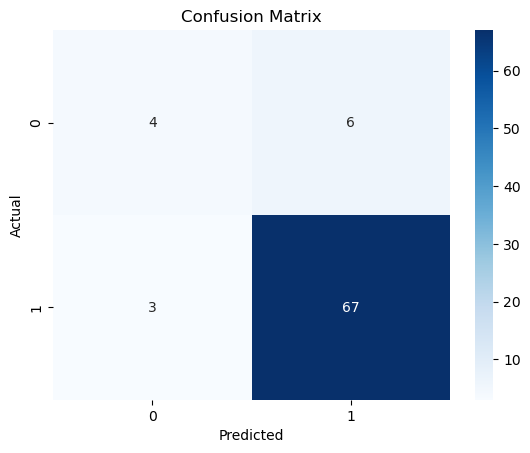

In [45]:
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()